# 통계분석 과제 (ANOVA)
## One -Way ANOVA 
- titanic 데이터에서 class에 따른 평균 fare의 차이가 있는지를 검정하세요 


In [4]:
import pandas as pd 
df_t = pd.read_csv('c:/adp/data/titanic.csv')

In [39]:
df_t.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [40]:
df_t.value_counts('class')

class
Third     491
First     216
Second    184
dtype: int64

In [44]:
First2 = df_t[df_t['class'] == 'First'] 
Second2 = df_t[df_t['class'] == 'Second'] 
Third2 = df_t[df_t['class'] == 'Third'] 

In [54]:
# 정규성 검정
import scipy.stats as stats  

print(stats.shapiro(First2['fare']))
print(stats.shapiro(Second2['fare']))
print(stats.shapiro(Third2['fare']))

# 유의수준 0.05보다 작으므로 정규분포를 따른다고 볼 수 없음

ShapiroResult(statistic=0.718401312828064, pvalue=7.556354866266318e-19)
ShapiroResult(statistic=0.7785055637359619, pvalue=2.1134516002102284e-15)
ShapiroResult(statistic=0.6183854937553406, pvalue=1.5995106796893175e-31)


In [61]:
# kruskal 검증
stats.kruskal(First2['fare'], Second2['fare'], Third2['fare'])

# 귀무가설: class에 따른 평균 fare의 차이가 없다.
# 대립가설: class에 따른 평균 fare의 차이가 있다.

# 유의확률이 7.586096900646798e-96으로 0.05보다 작으므로 귀무가설을 기각한다.
# 즉, class에 따른 평균 fare의 차이가 있다고 할 수 있다.

KruskalResult(statistic=438.0437034212556, pvalue=7.586096900646798e-96)

In [69]:
## 사후검정
# 어떤 class간 차이가 있는지 check
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data= df_t["fare"], groups=df_t["class"] )
tuekeyhsd = mc.tukeyhsd(alpha=0.05)
tuekeyhsd.summary()
# 1<>2, 1<>3 는 P-value가 0.05보다 작아서 Fare평균이 유의미하게 차이가 난다고 볼 수 있고
# 2<>3 는  P-value가 0.05보다 커서 Fare평균이 유의미하게 차이가 난다고 볼 수 없음


group1,group2,meandiff,p-adj,lower,upper,reject
First,Second,-63.4925,-0.0,-72.9165,-54.0685,True
First,Third,-70.4791,-0.0,-78.1489,-62.8094,True
Second,Third,-6.9866,0.108,-15.1064,1.1331,False


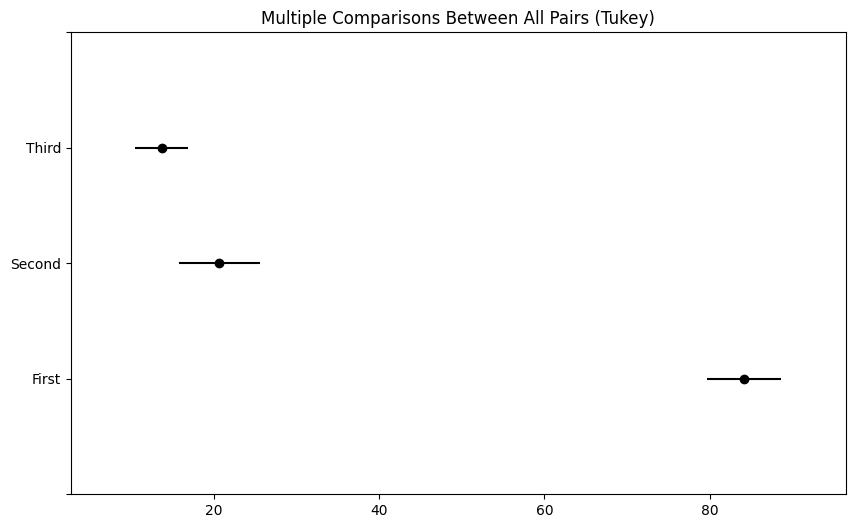

In [70]:
fig = tuekeyhsd.plot_simultaneous()


## Two -Way ANOVA 
- titanic 데이터에서 class와 sex에 따른 fare의 차이를 검정하세요. 
- 1. 교호작용효과 검정 
- 2. class효과 검정 
- 3. sex 효과 검정 

In [20]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [13]:
df_t2 = df_t[["class", "sex", "fare"]]
df_t2.tail()

,class,sex,fare
886,Second,male,13.00
887,First,female,30.00
888,Third,female,23.45
889,First,male,30.00
890,Third,male,7.75


In [34]:
class2 = df_t2["class"]
sex2 = df_t2["sex"]
fare2 = df_t2["fare"]

In [37]:
## 분산분석 수행 
formula = 'fare2 ~ C(class2)*C(sex2)'
model = ols(formula, df_t2).fit()
aov_table = anova_lm(model, typ=2)

In [38]:
aov_table

,sum_sq,df,F,PR(>F)
C(class2),7.347122e+05,2.0,242.620968,9.763645e-85
C(sex2),3.174857e+04,1.0,20.968394,5.337586e-06
C(class2):C(sex2),5.002816e+04,2.0,16.520591,9.034206e-08
Residual,1.339992e+06,885.0,NaN,NaN


In [ ]:
# C(class2) : P-value가 0.05보다 작으므로 class에 따른 fare가 유의미한 차이가 존재함
# C(sex2) : P-value가 0.05보다 작으므로 sex 따른 fare가 유의미한 차이가 존재함
# C(class2):C(sex2) : P-value가 0.05보다 작으므로 유의미한 교호작용이 존재함